In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

import xlrd

In [29]:
df = pd.read_excel('C:\\Users\\kenne\\Desktop\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)

print(df.columns)

df.head(3)

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000


In [30]:
df.describe(include='all')

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,351,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
unique,351,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,Perry Village,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,NaN,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,NaN,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,NaN,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,NaN,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,NaN,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000


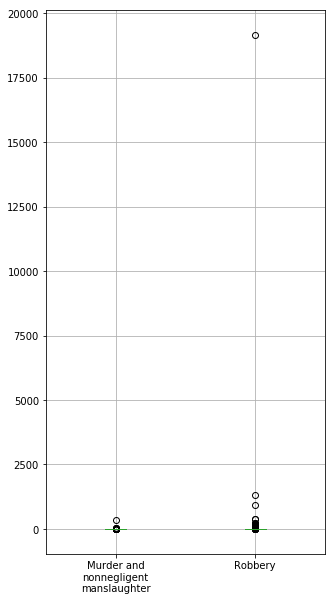

In [31]:
plt.figure(figsize=(5, 10))
df.boxplot(column=['Murder and\nnonnegligent\nmanslaughter', 'Robbery'])
plt.show()

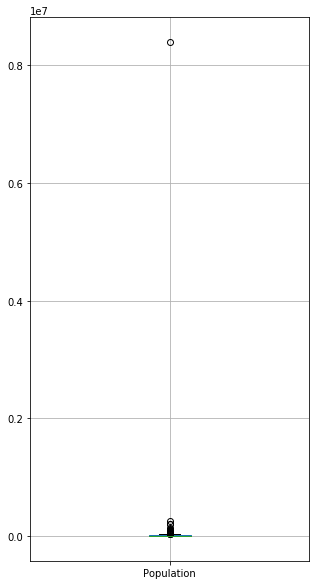

In [32]:
plt.figure(figsize=(5, 10))
df.boxplot(column=['Population'])
plt.show()

In [33]:
df.drop(df[(df.Robbery > 2500)].index, inplace=True)
df.drop(df[(df.Population > 2000000)].index, inplace=True)

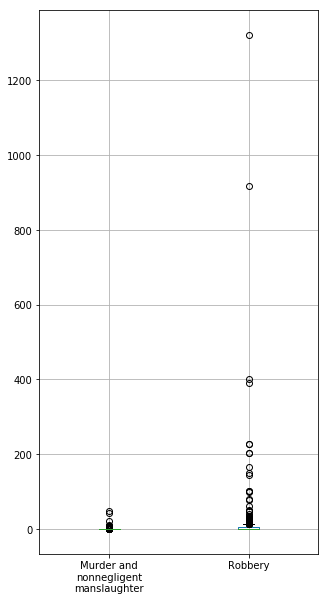

In [34]:
plt.figure(figsize=(5, 10))
df.boxplot(column=['Murder and\nnonnegligent\nmanslaughter', 'Robbery'])
plt.show()

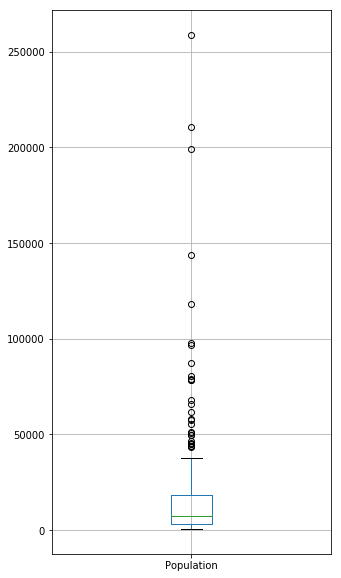

In [35]:
plt.figure(figsize=(5, 10))
df.boxplot(column=['Population'])
plt.show()

In [36]:
df['Pop_Sqrd'] = df['Population'] ** 2
df['Murder_Cat'] = df['Murder and\nnonnegligent\nmanslaughter'].dropna().map(lambda x: 1 if x > 0 else 0)
df['Robbery_Cat'] = df.Robbery.dropna().map(lambda x: 1 if x > 0 else 0)

df.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Pop_Sqrd,Murder_Cat,Robbery_Cat
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,3463321.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,6640929.000,0.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,8099716.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan,9595377936.000,1.000,1.000
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan,40806544.000,0.000,1.000


In [45]:
data_rdy = df[['Population', 'Pop_Sqrd', 'Murder_Cat', 'Robbery_Cat', 'Property\ncrime']].dropna()

data_rdy.describe()

,Population,Pop_Sqrd,Murder_Cat,Robbery_Cat,Property crime
count,347.000,347.000,347.000,347.000,347.000
mean,15956.686,985840709.758,0.138,0.599,385.752
std,27080.219,5067232380.434,0.346,0.491,1034.369
min,526.000,276676.000,0.000,0.000,0.000
25%,2997.000,8982153.000,0.000,0.000,40.000
50%,7187.000,51652969.000,0.000,1.000,112.000
75%,18160.500,329804222.500,0.000,1.000,340.500
max,258789.000,66971746521.000,1.000,1.000,12491.000


In [46]:
#Instantiate and fit the model
regr = linear_model.LinearRegression()
Y = data_rdy['Property\ncrime']
X = data_rdy[['Population', 'Pop_Sqrd', 'Murder_Cat', 'Robbery_Cat']]
regr.fit(X, Y)

#inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: \n')
print(regr.score(X, Y))


Coefficients: 
 [1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]

Intercept: 
 -16.815866321663066

R-squared: 

0.8444937611173492


The model where the outcome Property Crime is predicted by the features Population, Population Squared, Murder Category and Robbery Category explains 84.45% of the variance in Property Crime.

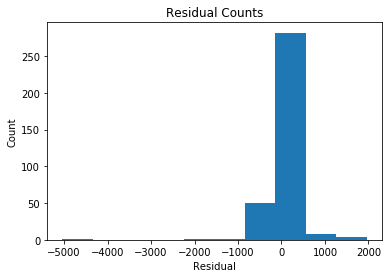

In [48]:
# Extract predicted values
predicted = regr.predict(X).ravel()
actual = data_rdy['Property\ncrime']

#calculate residual
residual = actual - predicted

plt.hist(residual)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residual Counts')
plt.show()

The distribution is primarily normal with the exception of minor skewness towards higher and lower residuals.

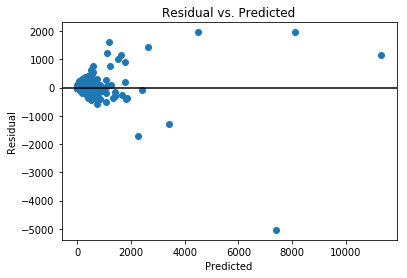

In [51]:
#plotting for homoscedasicity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.axhline(y=0, color='black')
plt.show()

The distribution between residual and predicted seems to be evenly placed, without any discerning pattern one direction or the other.

In [50]:
#identifying correlations among features
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Pop_Sqrd,Murder_Cat,Robbery_Cat
Population,1.000,0.889,0.503,0.344
Pop_Sqrd,0.889,1.000,0.345,0.152
Murder_Cat,0.503,0.345,1.000,0.311
Robbery_Cat,0.344,0.152,0.311,1.000


Population is highly correlated with Population Squared as can be expected. But amongst the other variables, correlation is low with the only possible exception between Population and Murder Category.